### 准备工作

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')

### 作业1

模仿上面的例子，画出交易总数最高的10个公司的条形图  
提示：可以使用sort_values(by= quantity) 来实现。

#### 导入数据

In [3]:
df = pd.read_excel('sample-salesv3.xlsx')
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


#### 按公司分组求交易总数

In [4]:
top10 = df.groupby('name')['quantity'].agg(['sum']).reset_index().sort_values(by='sum', ascending=False)[:10]
top10.rename(columns={'name': 'Name', 'sum': 'Quantity'}, inplace=True)
top10

,Name,Quantity
17,Trantow-Barrows,2271
12,Kulas Inc,2265
18,White-Trantow,2258
3,"Fritsch, Russel and Anderson",2112
0,Barton LLC,2041
6,Jerde-Hilpert,1999
2,"Frami, Hills and Schmidt",1903
19,Will LLC,1828
8,Keeling LLC,1806
10,Koepp Ltd,1790


#### 绘制条形图

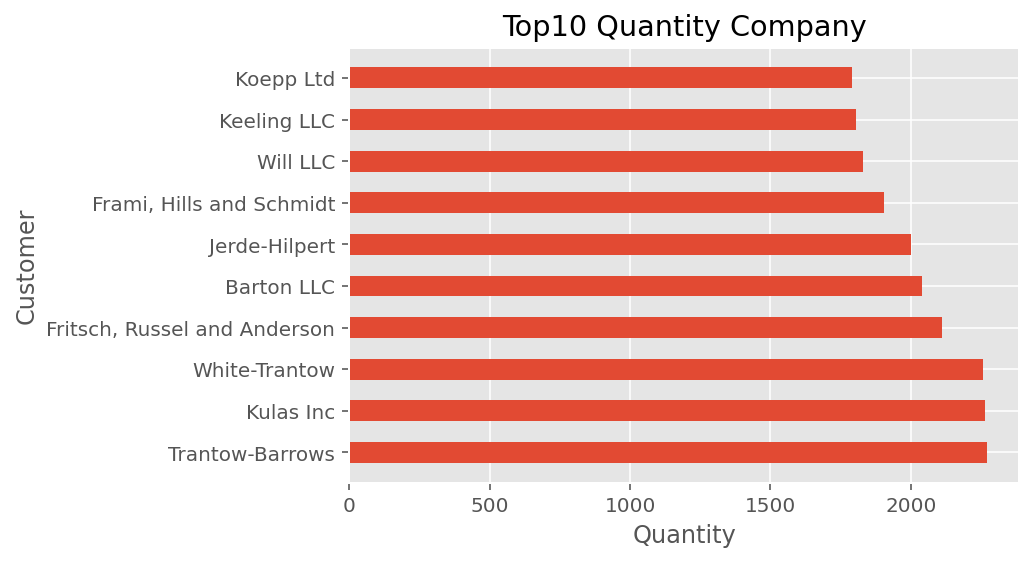

In [5]:
plt.barh(np.arange(10), top10.Quantity, tick_label=top10.Name, height=0.5)
plt.title('Top10 Quantity Company')
plt.ylabel('Customer')
plt.xlabel('Quantity')
plt.show()

### 作业2

- 模仿上述例子，画出花萼宽度和长度的散点图，使用品种划分数据
- 模仿上述例子，画出花萼的长度的箱线图，使用品种划分数据

#### 导入seaborn

In [6]:
import seaborn as sns

#### 导入数据

In [8]:
iris = pd.read_csv('iris.txt')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### 绘制散点图

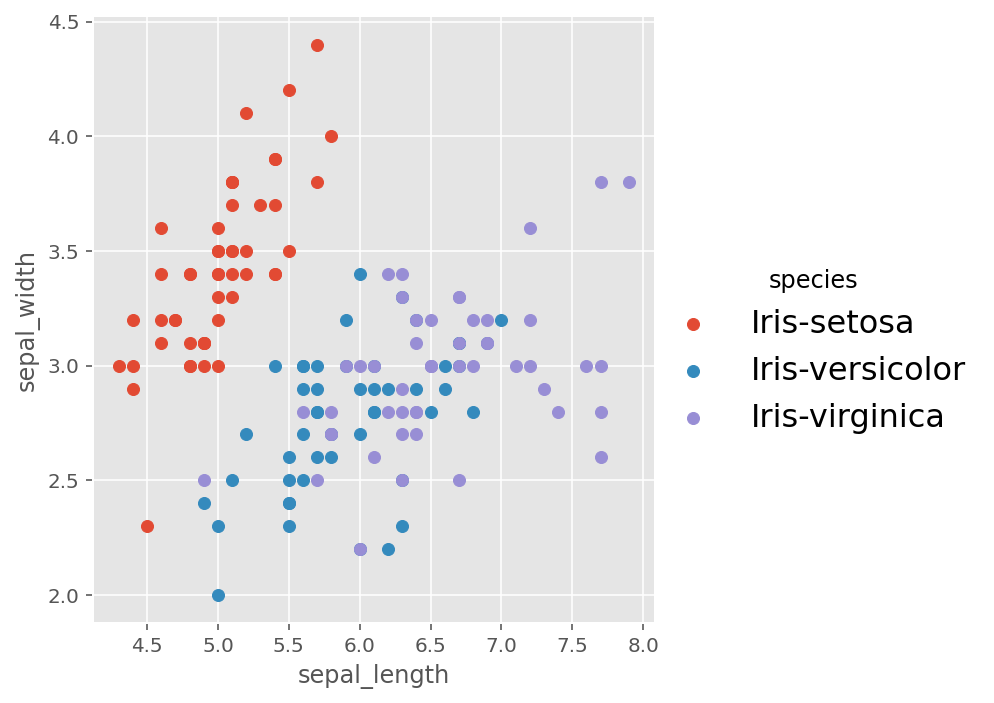

In [10]:
sns.FacetGrid(data=iris, height=5, hue='species').map(plt.scatter, 'sepal_length', 'sepal_width').add_legend(fontsize=16)

#### 绘制箱线图

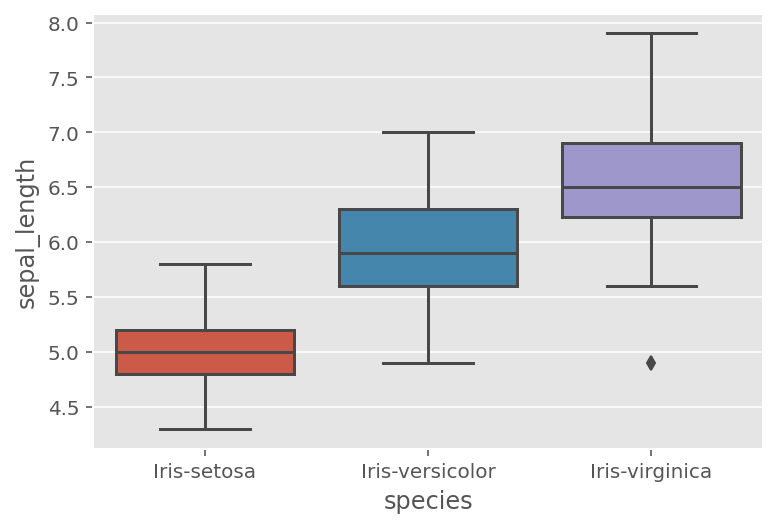

In [11]:
sns.boxplot(data=iris, x='species', y='sepal_length')
plt.show()